# Visualisation for condor optimisation paper

import statements and settings

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import DBSCAN


In [2]:
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data import and data munging

In [3]:
run_1_url = '/Users/b1017579/Documents/PhD/Projects/13-htc-condor/HTC-Sim/optimisation/algorithms/pareto_front/nsga_ii/run_2/data/data/pareto*.csv'
run_2_url = '/Users/b1017579/Documents/PhD/Projects/13-htc-condor/HTC-Sim/optimisation/algorithms/pareto_front/nsga_ii/run_3/data/pareto*.csv'

glob_list = []
for url in [run_1_url, run_2_url]:
    globbed_files = glob.glob(url)
    glob_list.append(globbed_files)

every_run = []
for i, globbed_files in enumerate(glob_list):
    data=[]
    for csv in globbed_files:
        frame = pd.read_csv(csv, header=None)
        if i == 0:
            frame['filename'] = int(os.path.basename(csv).split("_")[2].split(".")[0])
        else:
            frame['filename'] = 98+int(os.path.basename(csv).split("_")[2].split(".")[0])
        data.append(frame)
    every_run.append(pd.concat(data))
data = pd.concat(every_run)

In [4]:
def action_to_input(action):
    to_write=[]
    
    
    action = list(action.values)
    results = action[:2]
    
    to_write.append(results[0])
    to_write.append(results[1])
    action = action[2:]
    boolean = ["FALSE", "TRUE"]
    to_write.append(boolean[int(action[0])])
    computerClusterWhole = ["Computer", "Cluster", "Whole"]
    to_write.append(computerClusterWhole[int(action[1])])
    epsilonPolicy = ["Days", "Previous", "Ratio", "Hit"]
    to_write.append(epsilonPolicy[int(action[2])])
    to_write.append([action[3], action[4]])
    to_write.append([action[5], action[6], action[7]])
    to_write.append(action[8])
    to_write.append(action[9])
    to_write.append(action[10])
    to_write.append([action[11], action[12], action[13]])
    to_write.append(action[14])
    to_write.append(boolean[int(action[15])])
    to_write.append(boolean[int(action[16])])
    to_write.append(boolean[int(action[17])])
    to_write.append(action[18])
    to_write.append(action[19])
    return to_write

In [5]:
parameter_pareto = pd.DataFrame(data.iloc[:,:].apply(lambda x: action_to_input(x), axis=1).values.tolist(), columns=['average_overhead', 'power_condor_total','week', 'computerClusterWhole', 'epsilonPolicy', 'ranges', 'epsilon', "ratio", 'days', 'change', 'rewardBoundaries', 'history', "sanity", "gaussian", "prior", "threshold", "run_number"])
parameter_pareto[['ranges_1', 'ranges_2']] = pd.DataFrame(parameter_pareto['ranges'].values.tolist(), index = parameter_pareto.index)
parameter_pareto[['epsilon_1', 'epsilon_2', 'epsilon_3']] = pd.DataFrame(parameter_pareto['epsilon'].values.tolist(), index = parameter_pareto.index)
parameter_pareto[['rewardBoundaries_1', 'rewardBoundaries_2', 'rewardBoundaries_3']] = pd.DataFrame(parameter_pareto['rewardBoundaries'].values.tolist(), index = parameter_pareto.index)
pareto_cleaned = parameter_pareto.drop(columns=['rewardBoundaries', 'ranges', 'epsilon'])

pareto_cleaned.head()


average_overhead  power_condor_total   week computerClusterWhole epsilonPolicy     ratio   days    change   history sanity gaussian  prior  threshold  run_number  ranges_1  ranges_2  epsilon_1  epsilon_2  epsilon_3  rewardBoundaries_1  rewardBoundaries_2  rewardBoundaries_3
0       3837.758137           42.058321   TRUE                Whole      Previous  0.526692   57.0  0.673231  637980.0   TRUE    FALSE   TRUE   0.958731        16.0   26477.0  633334.0   0.790899   0.790899   0.790899           -0.775780           -0.729106            0.640363
1       3819.238942           43.691506   TRUE              Cluster         Ratio  0.118627  278.0  0.000000  655112.0   TRUE     TRUE  FALSE   0.283855        16.0  145699.0  145699.0   0.372553   0.326789   0.326789           -0.237542           -0.237542           -0.237542
2         21.276535           52.765028  FALSE                Whole           Hit  0.000000   91.0  0.430545  196625.0   TRUE     TRUE  FALSE   0.416833        16.0  361145.0  368618.0   0.789922   0.597716   0.549558           -0.726098           -0.726098            0.550871
3         11.660898          102.956936  FALSE             Computer          Days  0.009660  154.0  0.261249  488962.0  FALSE     TRUE  FALSE   0.000000        16.0  292175.0  292175.0   0.870951   0.267354   0.267354           -0.246311            0.253640            0.253640
4       3840.402272           42.023774   TRUE                Whole      Previous  0.526692   57.0  0.673231  476080.0   TRUE     TRUE  FALSE   0.634799        16.0   75092.0  139038.0   0.790899   0.790899   0.790899           -0.775780           -0.729106            0.640363

# Visualisation

## Energy and Overhead Time per Iteration Visualisation

(4500, 0)

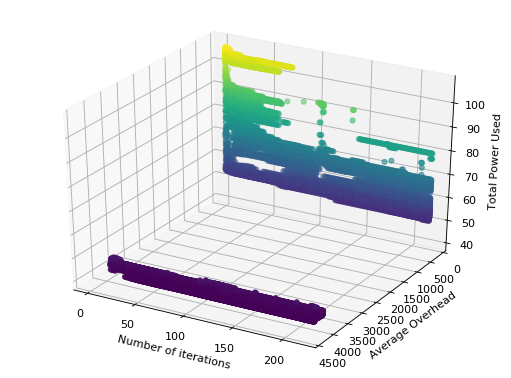

In [6]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.gca(projection='3d')
ax.scatter(pareto_cleaned['run_number'], pareto_cleaned['average_overhead'], pareto_cleaned['power_condor_total'], c=pareto_cleaned['power_condor_total'])
plt.xlabel('Number of iterations')
plt.ylabel("Average Overhead")
ax.set_zlabel("Total Power Used")
plt.ylim(4500, 0)


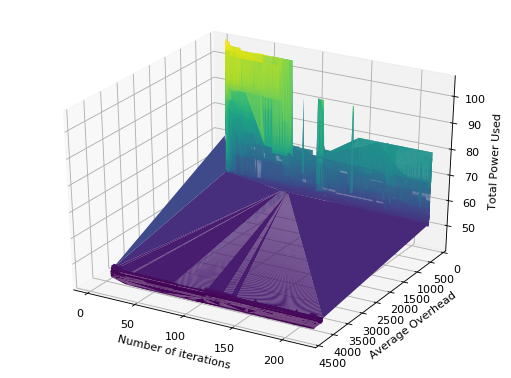

In [7]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.gca(projection='3d')
ax.plot_trisurf(pareto_cleaned['run_number'], pareto_cleaned['average_overhead'], pareto_cleaned['power_condor_total'], cmap=plt.cm.viridis, linewidth=0.2)
plt.ylim(4500, 0)
plt.xlabel('Number of iterations')
plt.ylabel("Average Overhead")
ax.set_zlabel("Total Power Used")
plt.show()
 
# to Add a color bar which maps values to colors.
# surf=ax.plot_trisurf(pareto_cleaned['power_condor_total'], pareto_cleaned['average_overhead'], pareto_cleaned['run_number'], cmap=plt.cm.viridis, linewidth=0.2)
# fig.colorbar( surf, shrink=0.5, aspect=5)

# plt.zlabel('run_number')
# plt.show()


Text(0, 0.5, 'Average Overhead')

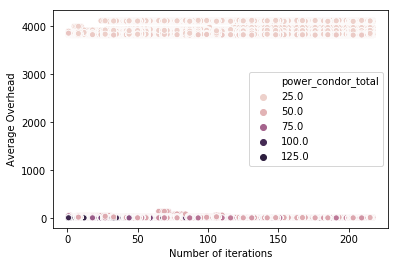

In [8]:
sns.scatterplot(pareto_cleaned['run_number'], pareto_cleaned['average_overhead'], hue=pareto_cleaned['power_condor_total'])
plt.xlabel('Number of iterations')
plt.ylabel("Average Overhead")
# ax.set_zlabel("Total Power Used")

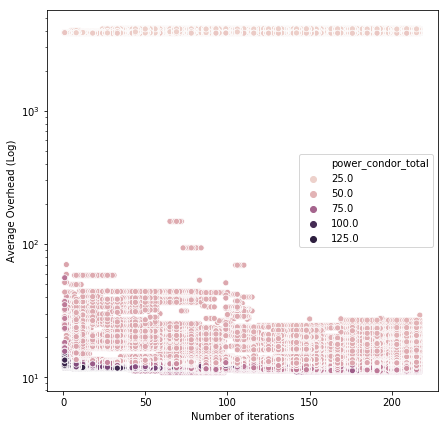

In [9]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")

sns.scatterplot(pareto_cleaned['run_number'], pareto_cleaned['average_overhead'], hue=pareto_cleaned['power_condor_total'])
plt.xlabel('Number of iterations')
plt.ylabel("Average Overhead (Log)")
ax.set_yscale('log')
# ax.set_zlabel("Total Power Used")

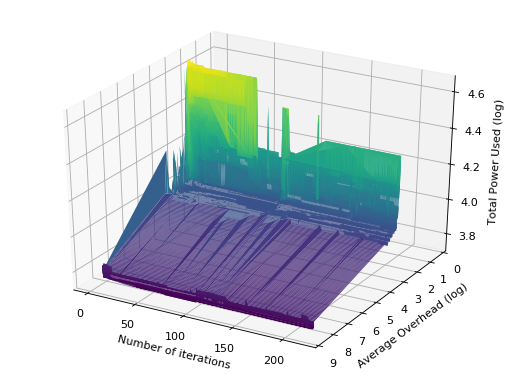

In [10]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.gca(projection='3d')
ax.plot_trisurf(pareto_cleaned['run_number'], np.log(pareto_cleaned['average_overhead']), np.log(pareto_cleaned['power_condor_total']), cmap=plt.cm.viridis, linewidth=0.2)
# ax.set(zscale="log", yscale="log")
plt.ylim(9, 0)
plt.xlabel('Number of iterations')
plt.ylabel("Average Overhead (log)")
ax.set_zlabel("Total Power Used (log)")
plt.show()
 

(9, 3)

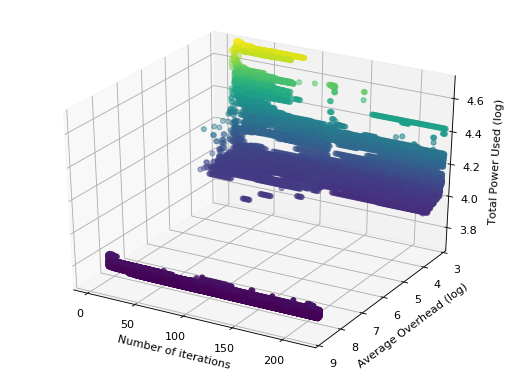

In [11]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.gca(projection='3d')
ax.scatter(pareto_cleaned['run_number'], np.log(pareto_cleaned['average_overhead']), np.log(pareto_cleaned['power_condor_total']), c=pareto_cleaned['power_condor_total'])
plt.xlabel('Number of iterations')
plt.ylabel("Average Overhead (log)")
ax.set_zlabel("Total Power Used (log)")
plt.ylim(9, 3)

Splitting between extreme cluster and rest

In [12]:
cluster_pareto = pareto_cleaned[pareto_cleaned.average_overhead < 500]
extreme_pareto = pareto_cleaned[pareto_cleaned.average_overhead > 500]

(5, 2.0)

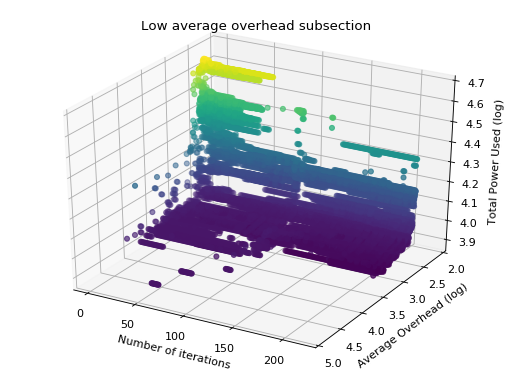

In [13]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.gca(projection='3d')
ax.scatter(cluster_pareto['run_number'], np.log(cluster_pareto['average_overhead']), np.log(cluster_pareto['power_condor_total']), c=cluster_pareto['power_condor_total'])
plt.title("Low average overhead subsection")
plt.xlabel('Number of iterations')
plt.ylabel("Average Overhead (log)")
ax.set_zlabel("Total Power Used (log)")
plt.ylim(5, 2.0)

(8.34, 8.22)

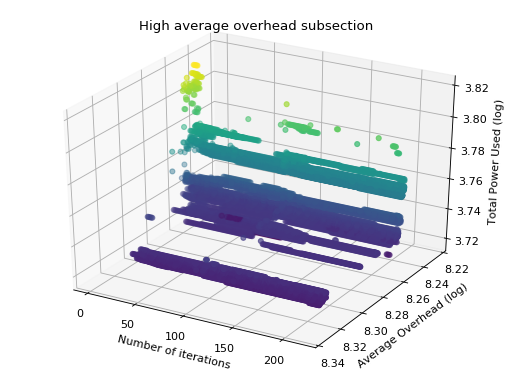

In [14]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.gca(projection='3d')
ax.scatter(extreme_pareto['run_number'], np.log(extreme_pareto['average_overhead']), np.log(extreme_pareto['power_condor_total']), c=extreme_pareto['power_condor_total'])
plt.title("High average overhead subsection")
plt.xlabel('Number of iterations')
plt.ylabel("Average Overhead (log)")
ax.set_zlabel("Total Power Used (log)")
plt.ylim(8.34, 8.22)



## Each Parameter overlayed on Pareto Front 

All iterations

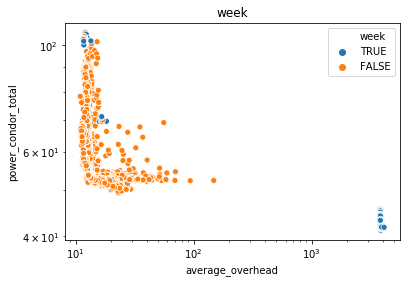

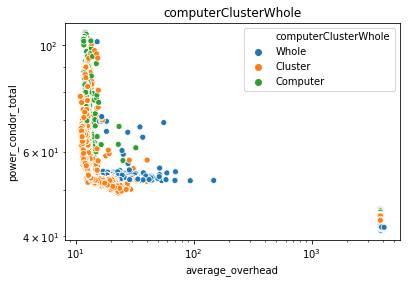

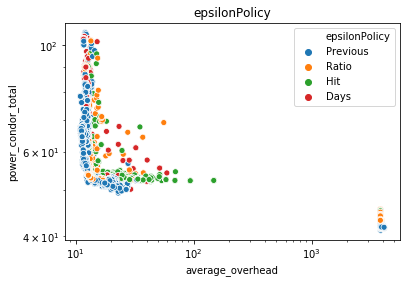

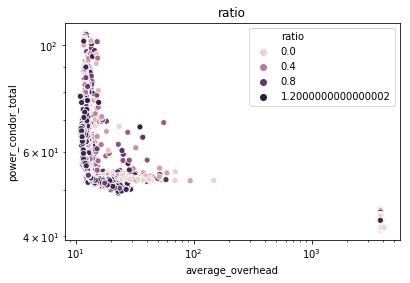

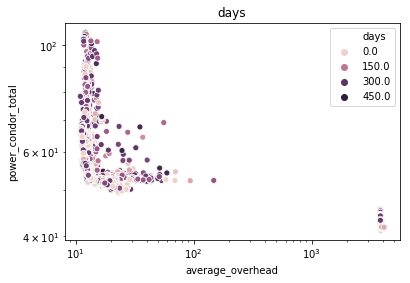

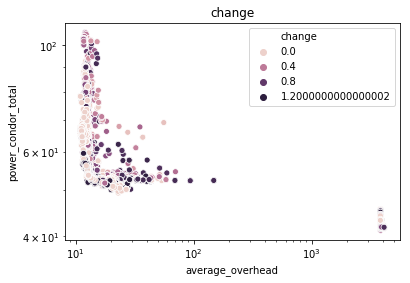

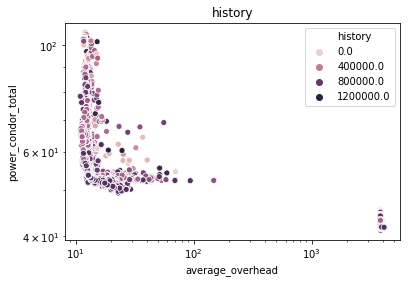

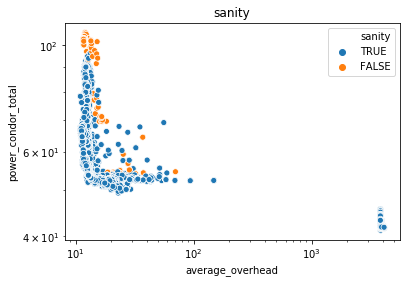

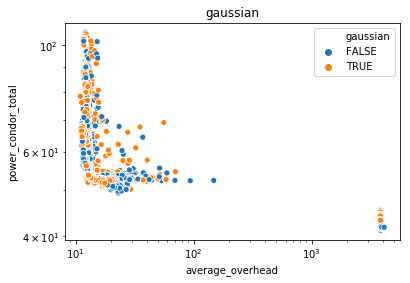

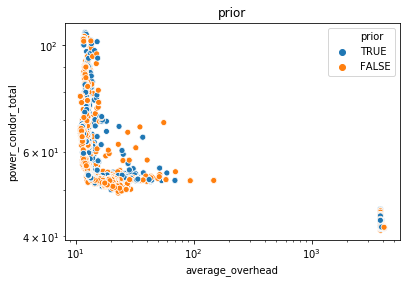

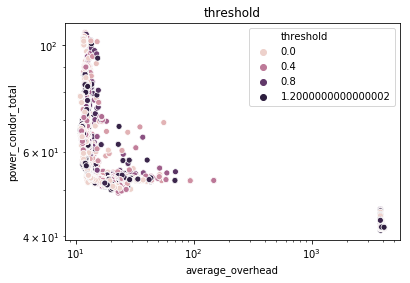

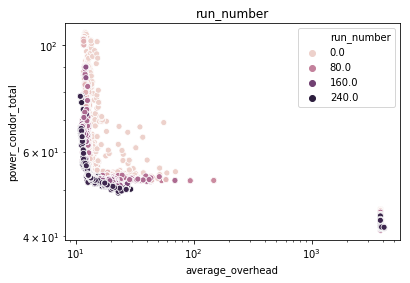

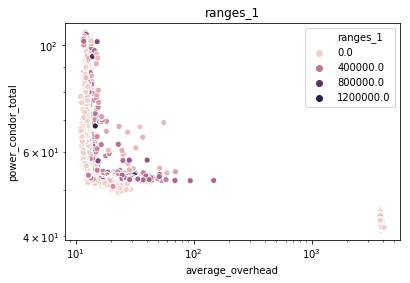

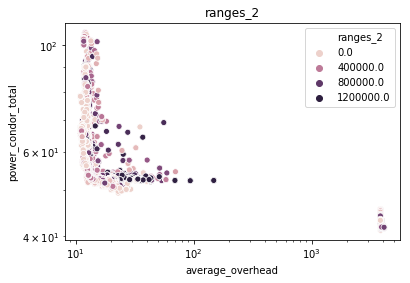

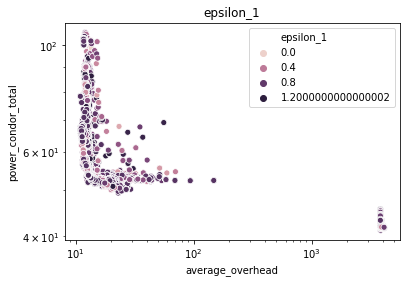

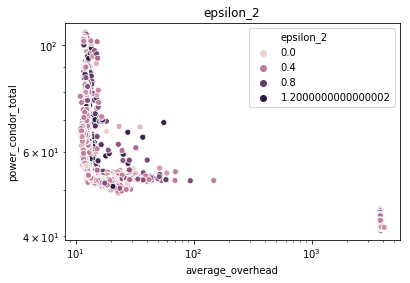

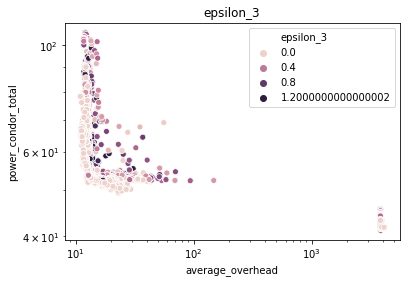

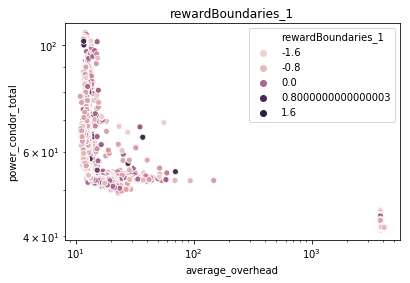

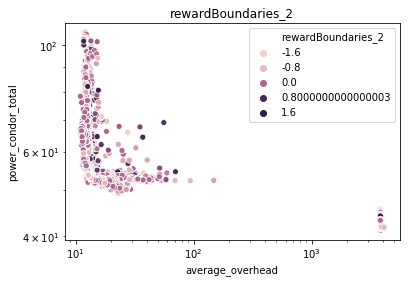

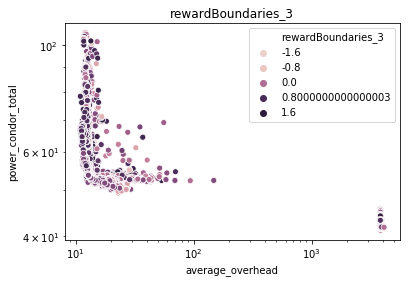

In [15]:
factors = pareto_cleaned.iloc[:,2:].columns

for factor in factors:
    plt.figure()
    g = sns.scatterplot(pareto_cleaned['average_overhead'], pareto_cleaned['power_condor_total'], hue=pareto_cleaned[factor])
    g.set(xscale="log");
    g.set(yscale="log");
    plt.title(factor)
    plt.show()
    plt.close()

Pareto front (final iteration)

In [16]:
largest_run_number = np.max(pareto_cleaned.run_number)

pareto_frontier = pareto_cleaned[pareto_cleaned.run_number == largest_run_number]

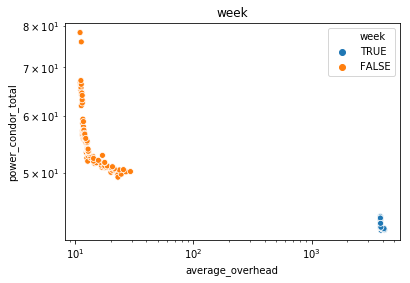

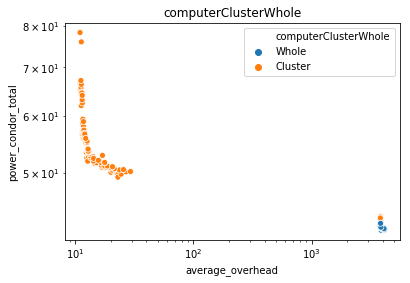

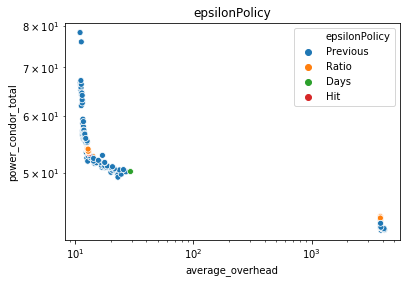

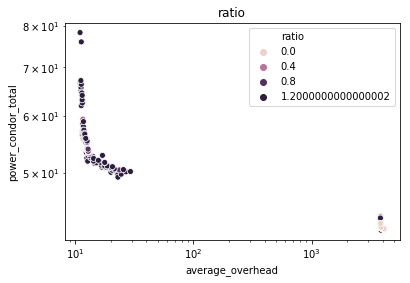

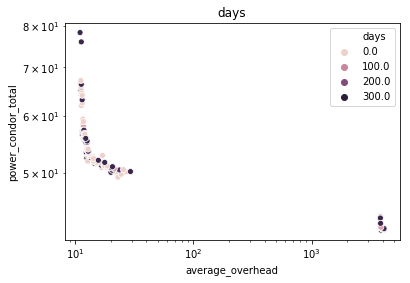

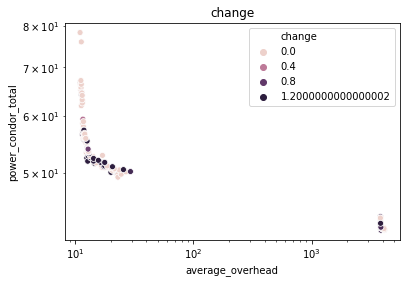

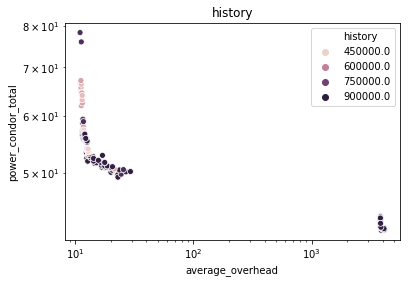

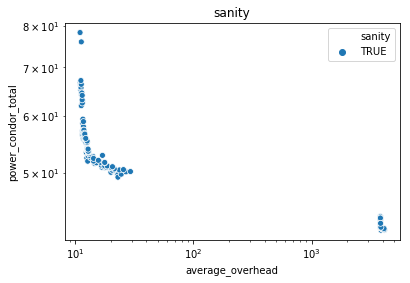

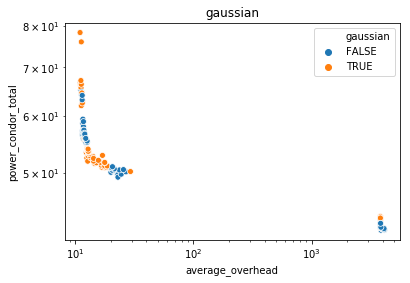

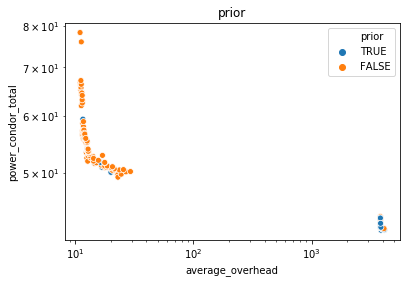

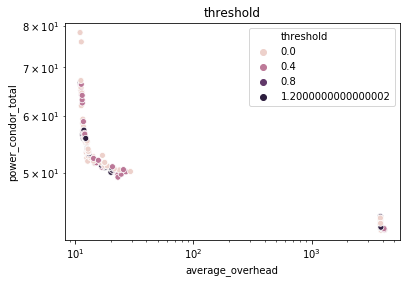

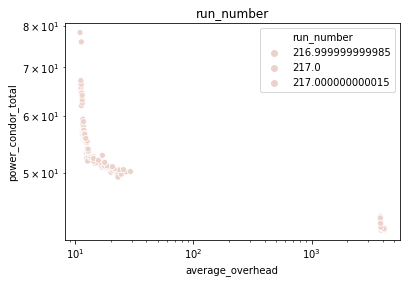

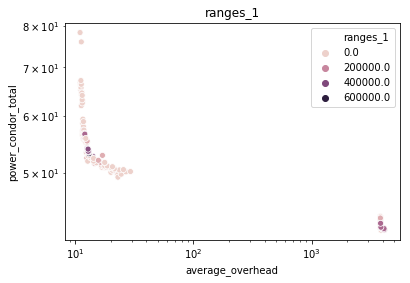

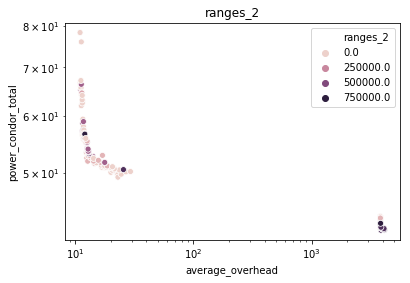

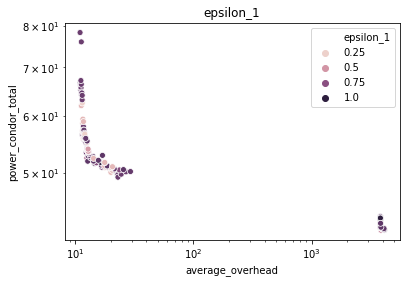

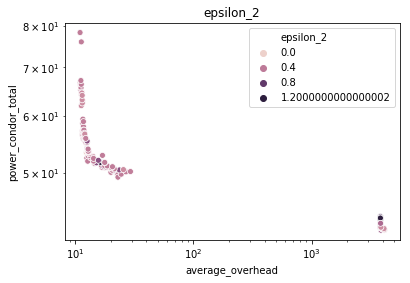

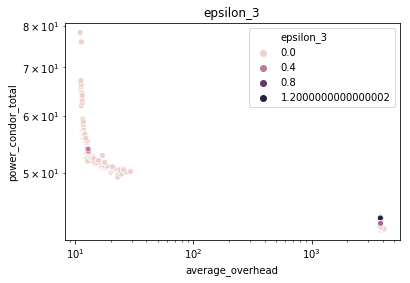

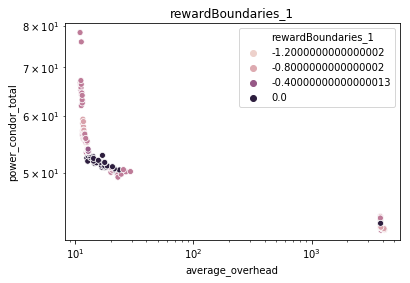

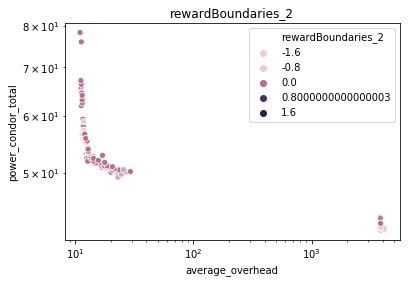

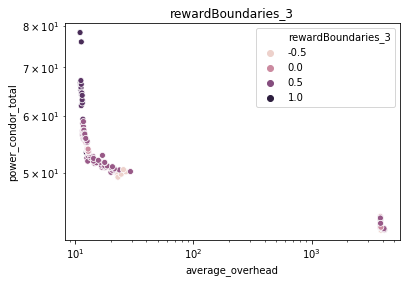

In [17]:
factors = pareto_frontier.iloc[:,2:].columns

for factor in factors:
    plt.figure()
    g = sns.scatterplot(pareto_frontier['average_overhead'], pareto_frontier['power_condor_total'], hue=pareto_frontier[factor])
    g.set(xscale="log");
    g.set(yscale="log");
    plt.title(factor)
    plt.show()
    plt.close()

## Violin Plots

In [18]:
pareto_cleaned.head()

average_overhead  power_condor_total   week computerClusterWhole epsilonPolicy     ratio   days    change   history sanity gaussian  prior  threshold  run_number  ranges_1  ranges_2  epsilon_1  epsilon_2  epsilon_3  rewardBoundaries_1  rewardBoundaries_2  rewardBoundaries_3
0       3837.758137           42.058321   TRUE                Whole      Previous  0.526692   57.0  0.673231  637980.0   TRUE    FALSE   TRUE   0.958731        16.0   26477.0  633334.0   0.790899   0.790899   0.790899           -0.775780           -0.729106            0.640363
1       3819.238942           43.691506   TRUE              Cluster         Ratio  0.118627  278.0  0.000000  655112.0   TRUE     TRUE  FALSE   0.283855        16.0  145699.0  145699.0   0.372553   0.326789   0.326789           -0.237542           -0.237542           -0.237542
2         21.276535           52.765028  FALSE                Whole           Hit  0.000000   91.0  0.430545  196625.0   TRUE     TRUE  FALSE   0.416833        16.0  361145.0  368618.0   0.789922   0.597716   0.549558           -0.726098           -0.726098            0.550871
3         11.660898          102.956936  FALSE             Computer          Days  0.009660  154.0  0.261249  488962.0  FALSE     TRUE  FALSE   0.000000        16.0  292175.0  292175.0   0.870951   0.267354   0.267354           -0.246311            0.253640            0.253640
4       3840.402272           42.023774   TRUE                Whole      Previous  0.526692   57.0  0.673231  476080.0   TRUE     TRUE  FALSE   0.634799        16.0   75092.0  139038.0   0.790899   0.790899   0.790899           -0.775780           -0.729106            0.640363

violin plots per variable

In [19]:
numeric_pareto_frontier = pareto_frontier.drop(columns=['week', 'computerClusterWhole', 'epsilonPolicy', 'sanity', 'gaussian', 'prior'])
numeric_pareto_frontier_long = pd.melt(numeric_pareto_frontier, id_vars=['average_overhead', 'power_condor_total'], value_vars=numeric_pareto_frontier.drop(columns=['average_overhead','power_condor_total']).columns)
numeric_pareto_frontier_long.head()

average_overhead  power_condor_total variable     value
0       3826.658093           42.273105    ratio  0.374692
1         19.422197           50.725284    ratio  0.937466
2       3826.430499           43.000630    ratio  0.641325
3       3826.625611           42.325279    ratio  0.000000
4       3818.975010           43.151965    ratio  0.937466

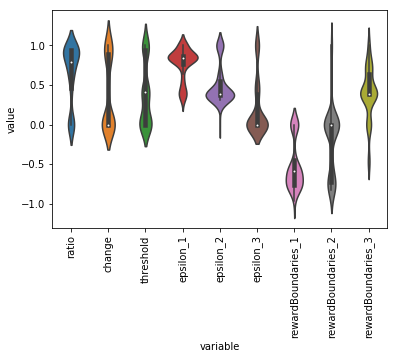

In [20]:
# numeric_pareto_frontier_long_small_vals = numeric_pareto_frontier_long[numeric_pareto_frontier_long.variable !=]
numeric_pareto_frontier_long_small_vals = numeric_pareto_frontier_long[~numeric_pareto_frontier_long['variable'].str.contains("ranges")]
numeric_pareto_frontier_long_small_vals = numeric_pareto_frontier_long_small_vals[~numeric_pareto_frontier_long_small_vals['variable'].str.contains("days")]
numeric_pareto_frontier_long_small_vals = numeric_pareto_frontier_long_small_vals[~numeric_pareto_frontier_long_small_vals['variable'].str.contains("run_")]
numeric_pareto_frontier_long_small_vals = numeric_pareto_frontier_long_small_vals[~numeric_pareto_frontier_long_small_vals['variable'].str.contains("history")]

sns.violinplot(data = numeric_pareto_frontier_long_small_vals, x='variable', y='value')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [21]:
def violin_plot_single_parameter(dat, variable):
    dat_and_var = dat[dat['variable'].str.contains(variable)]

    sns.violinplot(data = dat_and_var, x='variable', y='value')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()
    plt.close()

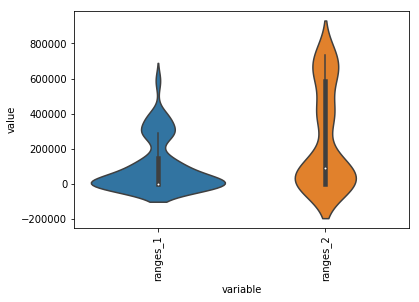

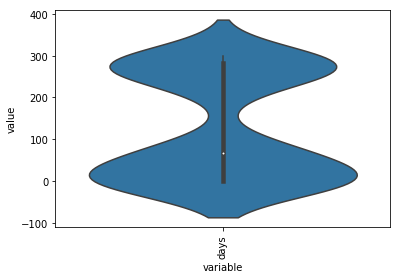

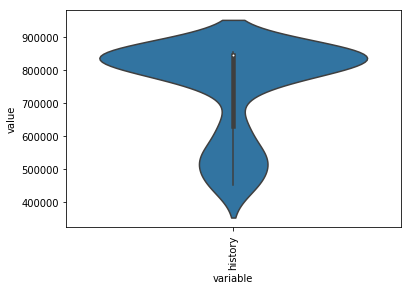

In [22]:
for param in ["ranges", 'days', 'history']:
    violin_plot_single_parameter(numeric_pareto_frontier_long, param)

## Plots over time 

In [23]:
def violin_small_params(dat):
    dat_smaller = dat[~dat['variable'].str.contains("ranges")]
    run_number = dat[dat['variable'].str.contains("run_")].value.iloc[0]
    dat_smaller = dat_smaller[~dat_smaller['variable'].str.contains("days")]
    dat_smaller = dat_smaller[~dat_smaller['variable'].str.contains("run_")]
    dat_smaller = dat_smaller[~dat_smaller['variable'].str.contains("history")]

    sns.violinplot(data = dat_smaller, x='variable', y='value')
    plt.title(run_number)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.savefig("/Users/b1017579/Documents/PhD/Projects/13-htc-condor/HTC-Sim/visualisation/pareto_front/violin/{}-iter-violin.png".format(str(int(run_number)).zfill(3)))
    plt.show()
    plt.close()
    
    


In [24]:
def wide_long_dat(dat):
    dat_long = dat.drop(columns=['week', 'computerClusterWhole', 'epsilonPolicy', 'sanity', 'gaussian', 'prior'])
    dat_long = pd.melt(dat_long, id_vars=['average_overhead', 'power_condor_total'], value_vars=numeric_pareto_frontier.drop(columns=['average_overhead','power_condor_total']).columns)
    return dat_long

In [25]:
def clean_dat_plot(dat):
    long = wide_long_dat(dat)
    violin_small_params(long)

In [26]:
# pareto_cleaned.groupby("run_number").apply(clean_dat_plot)

Static plots through time

In [27]:
pareto_cleaned.head()

average_overhead  power_condor_total   week computerClusterWhole epsilonPolicy     ratio   days    change   history sanity gaussian  prior  threshold  run_number  ranges_1  ranges_2  epsilon_1  epsilon_2  epsilon_3  rewardBoundaries_1  rewardBoundaries_2  rewardBoundaries_3
0       3837.758137           42.058321   TRUE                Whole      Previous  0.526692   57.0  0.673231  637980.0   TRUE    FALSE   TRUE   0.958731        16.0   26477.0  633334.0   0.790899   0.790899   0.790899           -0.775780           -0.729106            0.640363
1       3819.238942           43.691506   TRUE              Cluster         Ratio  0.118627  278.0  0.000000  655112.0   TRUE     TRUE  FALSE   0.283855        16.0  145699.0  145699.0   0.372553   0.326789   0.326789           -0.237542           -0.237542           -0.237542
2         21.276535           52.765028  FALSE                Whole           Hit  0.000000   91.0  0.430545  196625.0   TRUE     TRUE  FALSE   0.416833        16.0  361145.0  368618.0   0.789922   0.597716   0.549558           -0.726098           -0.726098            0.550871
3         11.660898          102.956936  FALSE             Computer          Days  0.009660  154.0  0.261249  488962.0  FALSE     TRUE  FALSE   0.000000        16.0  292175.0  292175.0   0.870951   0.267354   0.267354           -0.246311            0.253640            0.253640
4       3840.402272           42.023774   TRUE                Whole      Previous  0.526692   57.0  0.673231  476080.0   TRUE     TRUE  FALSE   0.634799        16.0   75092.0  139038.0   0.790899   0.790899   0.790899           -0.775780           -0.729106            0.640363

ratio


/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


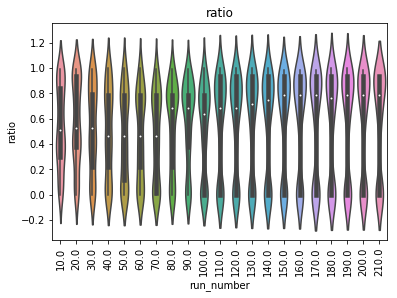

days


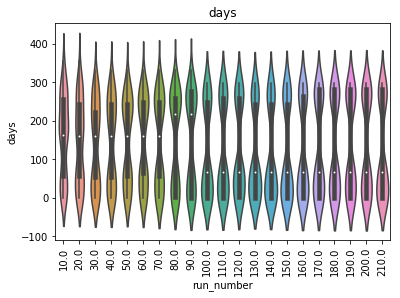

change


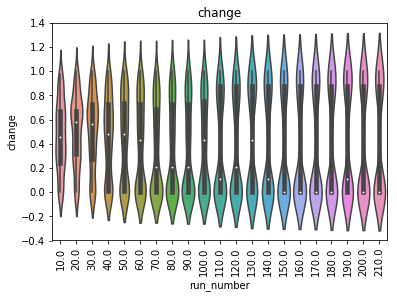

history


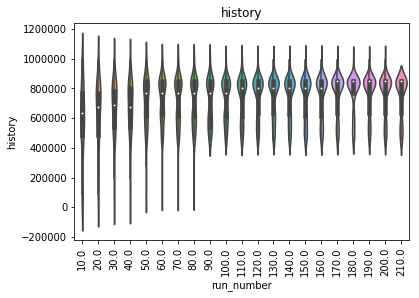

threshold


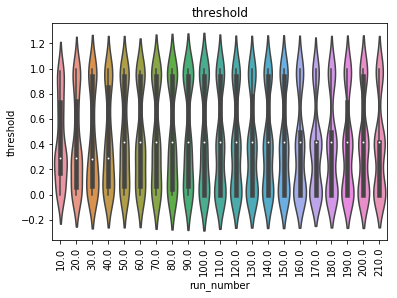

ranges_1


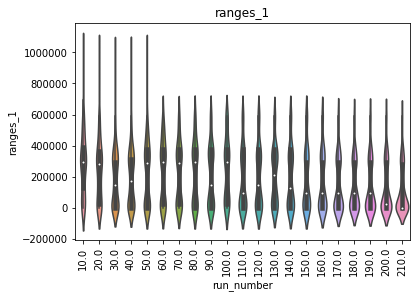

ranges_2


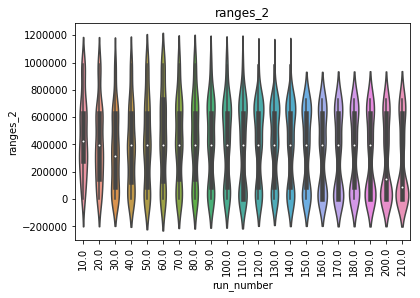

epsilon_1


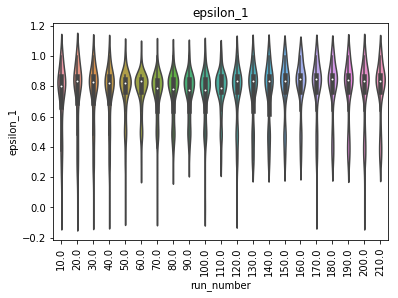

epsilon_2


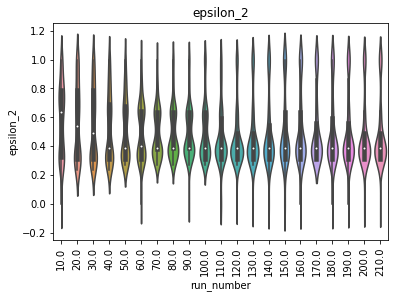

epsilon_3


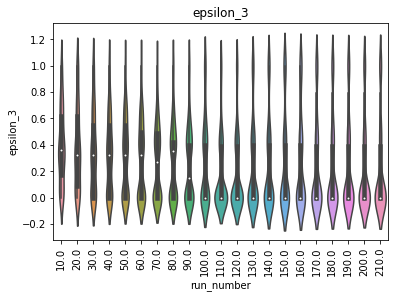

rewardBoundaries_1


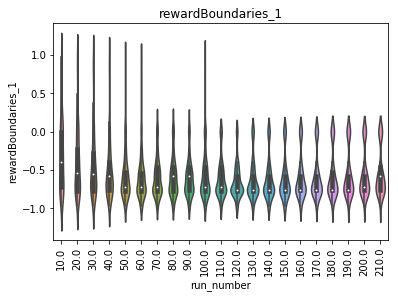

rewardBoundaries_2


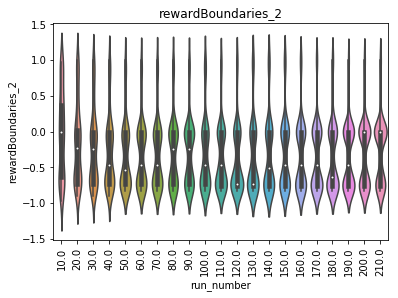

rewardBoundaries_3


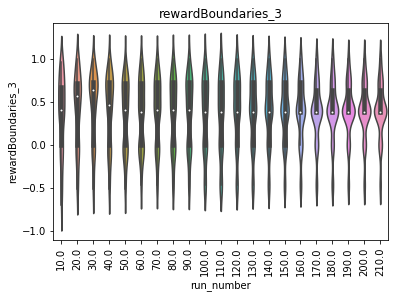

In [28]:
def violin_through_time(dat, param):
#     long = wide_long_dat(dat)
#     long = small_params(long)
    dat['run_number'] = pd.to_numeric(dat['run_number'])
    sns.violinplot(data = dat, x='run_number', y=param)
    plt.title(param)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()
    plt.close()

for param in pareto_cleaned.drop(columns=['power_condor_total', 'average_overhead', 'run_number','week', 'computerClusterWhole', 'epsilonPolicy', 'sanity', 'gaussian', 'prior']).columns:
    print(param)
    violin_through_time(pareto_cleaned[pareto_cleaned.run_number % 10 == 0], param)

## Plotting Violin Plots w.r.t. Cluster

Clustering

In [29]:
to_cluster = pareto_frontier.iloc[:,:2]   
to_cluster.head()

average_overhead  power_condor_total
22000       3826.658093           42.273105
22001         19.422197           50.725284
22002       3826.430499           43.000630
22003       3826.625611           42.325279
22004       3818.975010           43.151965

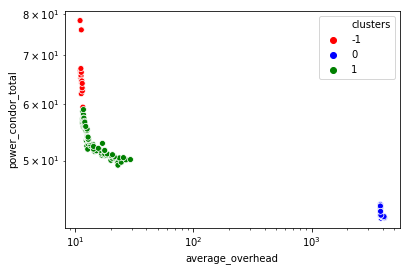

In [30]:
dbscan = DBSCAN(eps=5, min_samples = 20)
scaler = MinMaxScaler(feature_range=(1,100))
to_cluster = pd.DataFrame(scaler.fit_transform(to_cluster))
dbscan_clusters = dbscan.fit_predict(to_cluster)

pareto_frontier_clusters = pareto_frontier.copy()
pareto_frontier_clusters['clusters'] = dbscan.fit_predict(to_cluster)
pareto_frontier_clusters['clusters'] = pareto_frontier_clusters['clusters']
pareto_frontier_clusters['clusters'] = pareto_frontier_clusters.clusters.astype(str)

g=sns.scatterplot(data = pareto_frontier_clusters, x='average_overhead', y='power_condor_total', hue="clusters", palette=["r", "b", "g"])
g.set(xscale="log", yscale="log")
plt.show()

## Per Cluster Statistical Summary

In [31]:
pareto_frontier_clusters.groupby("clusters").describe()

average_overhead                                                                                           power_condor_total                                                                             ratio                                                                        days                                                        change                                                             history                                                                                 threshold                                                        run_number                                                ranges_1                                                                      ranges_2                                                                           epsilon_1                                                                       epsilon_2                                                                       epsilon_3                                          \
                    count         mean         std          min          25%          50%          75%          max              count       mean       std        min        25%        50%        75%        max count      mean       std       min       25%       50%       75%       max count        mean         std  min  25%    50%    75%    max  count      mean       std  min  25%       50%       75%       max   count           mean            std       min       25%       50%       75%       max     count      mean       std  min  25%       50%       75%  max      count   mean  std    min    25%    50%    75%    max    count           mean            std  min  25%      50%       75%       max    count           mean            std  min      25%       50%       75%       max     count      mean       std       min       25%       50%       75%       max     count      mean       std       min       25%       50%       75%       max     count      mean       std  min  25%  50%  75%   
clusters                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
-1                   21.0    11.248885    0.171978    10.942350    11.138266    11.226275    11.396486    11.570330               21.0  65.666161  4.273897  59.321815  63.115656  64.736739  66.501989  78.290891  21.0  0.902951  0.114297  0.466393  0.937466  0.937466  0.937466  0.937466  21.0  139.428571  137.912136  0.0  0.0  218.0  282.0  299.0   21.0  0.149438  0.328648  0.0  0.0  0.000000  0.000000  0.902549    21.0  557185.285714  102297.603974  488962.0  488962.0  540657.0  540657.0  805676.0      21.0  0.226262  0.272825  0.0  0.0  0.000000  0.416833  1.0       21.0  217.0  0.0  217.0  217.0  217.0  217.0  217.0     21.0       0.000000       0.000000  0.0  0.0      0.0       0.0       0.0     21.0   44805.571429  121499.912669  0.0      1.0       1.0       1.0  397602.0      21.0  0.746724  0.187816  0.312013  0.832252  0.832252  0.832252  0.849525      21.0  0.366534  0.035459  0.312013  0.312013  0.389694  0.389694  0.389694      21.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
0        

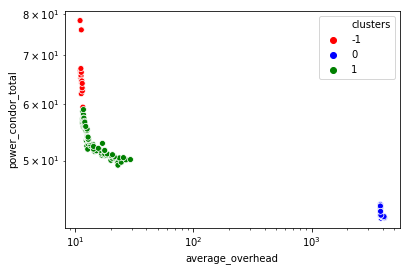

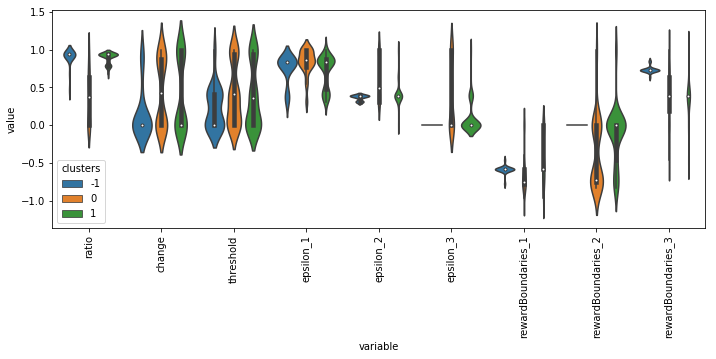

In [32]:
pareto_frontier_clusters_cleaned = pareto_frontier_clusters.drop(columns=['week', 'computerClusterWhole', 'epsilonPolicy', 'sanity', 'gaussian', 'prior'])
# pareto_frontier_clusters[['week', 'computerClusterWhole', 'epsilonPolicy', 'sanity', 'gaussian', 'prior']].astype('category') = pareto_frontier_clusters[['week', 'computerClusterWhole', 'epsilonPolicy', 'sanity', 'gaussian', 'prior']].cat.codes
pareto_frontier_clusters_long = pd.melt(pareto_frontier_clusters_cleaned, id_vars=['average_overhead', 'power_condor_total' ,'clusters'], value_vars=numeric_pareto_frontier.drop(columns=['average_overhead','power_condor_total']).columns)

pareto_frontier_clusters_long_small_vals = pareto_frontier_clusters_long[~numeric_pareto_frontier_long['variable'].str.contains("ranges")]
pareto_frontier_clusters_long_small_vals = pareto_frontier_clusters_long_small_vals[~pareto_frontier_clusters_long_small_vals['variable'].str.contains("days")]
pareto_frontier_clusters_long_small_vals = pareto_frontier_clusters_long_small_vals[~pareto_frontier_clusters_long_small_vals['variable'].str.contains("run_")]
pareto_frontier_clusters_long_small_vals = pareto_frontier_clusters_long_small_vals[~pareto_frontier_clusters_long_small_vals['variable'].str.contains("history")]


g=sns.scatterplot(data = pareto_frontier_clusters, x='average_overhead', y='power_condor_total', hue="clusters", palette=["r", "b", "g"])
g.set(xscale="log", yscale="log")
plt.show()

fig, ax = plt.subplots(figsize=(11.7, 4))
sns.violinplot(data = pareto_frontier_clusters_long_small_vals, x='variable', y='value', hue='clusters')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()


Converting cateogrial parameters to numbers so that they can be plot as a violin plot

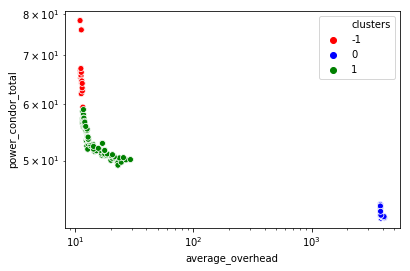

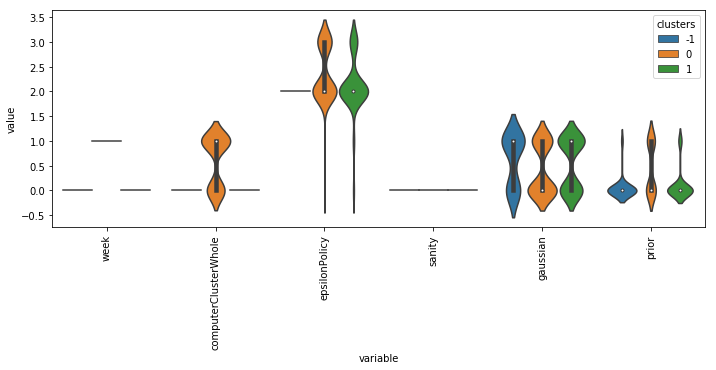

In [33]:
pareto_frontier_clusters_cat_codes = pareto_frontier_clusters.copy()

cat_cols = ['week', 'computerClusterWhole', 'epsilonPolicy', 'sanity', 'gaussian', 'prior']

for col in cat_cols:
    pareto_frontier_clusters_cat_codes[col] = pareto_frontier_clusters_cat_codes[col].astype('category')
    pareto_frontier_clusters_cat_codes[col] = pareto_frontier_clusters_cat_codes[col].cat.codes

pareto_frontier_clusters_cat_codes_long = pd.melt(pareto_frontier_clusters_cat_codes, id_vars=['average_overhead', 'power_condor_total' ,'clusters'], value_vars=['week', 'computerClusterWhole', 'epsilonPolicy', 'sanity', 'gaussian', 'prior'])

g=sns.scatterplot(data = pareto_frontier_clusters_long, x='average_overhead', y='power_condor_total', hue="clusters", palette=["r", "b", "g"])
g.set(xscale="log", yscale="log")
plt.show()

fig, ax = plt.subplots(figsize=(11.7, 4))
sns.violinplot(data = pareto_frontier_clusters_cat_codes_long, x='variable', y='value', hue='clusters', legend=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()


               variable  value clusters  average_overhead  power_condor_total
0  computerClusterWhole      0       -1                21                  21
1  computerClusterWhole      0        0                33                  33
2  computerClusterWhole      0        1                92                  92
3  computerClusterWhole      1        0                54                  54
4         epsilonPolicy      0        0                 1                   1


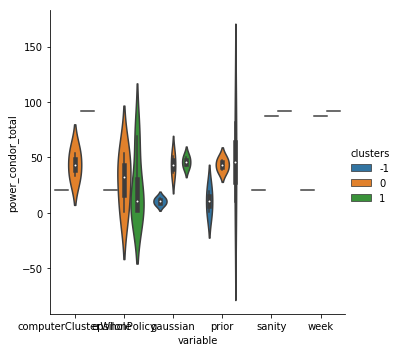

In [34]:
# sns.catplot(data=pareto_frontier_clusters_cat_codes_long, x='variable', y='value')
pareto_frontier_clusters_proportion = pareto_frontier_clusters_cat_codes_long.groupby(['variable', 'value', 'clusters']).count().reset_index()
print(pareto_frontier_clusters_proportion.head())
sns.catplot(data=pareto_frontier_clusters_proportion, x='variable', y='power_condor_total', hue='clusters', kind='violin')




In [35]:
pareto_frontier_clusters_cat_codes = pareto_frontier_clusters.copy()

cat_cols = ['week', 'computerClusterWhole', 'epsilonPolicy', 'sanity', 'gaussian', 'prior']

pareto_frontier_clusters_cats_long = pd.melt(pareto_frontier_clusters_cat_codes, id_vars=['average_overhead', 'power_condor_total' ,'clusters'], value_vars=['week', 'computerClusterWhole', 'epsilonPolicy', 'sanity', 'gaussian', 'prior'])
pareto_frontier_clusters_cats_long.to_csv("/Users/b1017579/Documents/PhD/Projects/13-htc-condor/HTC-Sim/notebooks/nsga2_pareto/paper-visualisation/data/long.csv")

pareto_frontier_clusters_cat_codes_long.to_csv("/Users/b1017579/Documents/PhD/Projects/13-htc-condor/HTC-Sim/notebooks/nsga2_pareto/paper-visualisation/data/long.csv")

pareto_front_long = pd.melt(pareto_frontier_clusters_cleaned, id_vars=['average_overhead', 'power_condor_total' ,'clusters'], value_vars=numeric_pareto_frontier.drop(columns=['average_overhead','power_condor_total']).columns)
pareto_front_long.to_csv('/Users/b1017579/Documents/PhD/Projects/13-htc-condor/HTC-Sim/notebooks/nsga2_pareto/paper-visualisation/data/long_all_dat.csv')
pareto_frontier_clusters_cleaned.to_csv('/Users/b1017579/Documents/PhD/Projects/13-htc-condor/HTC-Sim/notebooks/nsga2_pareto/paper-visualisation/data/wide_all_dat.csv')
pareto_frontier_clusters.head()

average_overhead  power_condor_total   week computerClusterWhole epsilonPolicy     ratio   days  change   history sanity gaussian  prior  threshold  run_number  ranges_1  ranges_2  epsilon_1  epsilon_2  epsilon_3  rewardBoundaries_1  rewardBoundaries_2  rewardBoundaries_3 clusters
22000       3826.658093           42.273105   TRUE                Whole      Previous  0.374692    0.0     1.0  771273.0   TRUE    FALSE   TRUE   0.982388       217.0   26477.0  633334.0   1.000000   1.000000   0.000000           -0.775780           -0.729106            0.640363        0
22001         19.422197           50.725284  FALSE              Cluster      Previous  0.937466    0.0     0.0  847384.0   TRUE     TRUE  FALSE   0.000000       217.0       0.0       1.0   0.832252   0.389694   0.000000           -0.584237           -0.463835           -0.463835        1
22002       3826.430499           43.000630   TRUE              Cluster         Ratio  0.641325    0.0     0.0  847384.0   TRUE     TRUE  FALSE   0.283855       217.0  145699.0  145699.0   0.849525   0.312013   0.000000           -0.968476            1.000000            1.000000        0
22003       3826.625611           42.325279   TRUE                Whole      Previous  0.000000  282.0     0.0  805676.0   TRUE    FALSE  FALSE   0.000000       217.0       0.0  736319.0   0.763624   0.487556   0.487556            0.000000            0.000000            0.771556        0
22004       3818.975010           43.151965   TRUE              Cluster         Ratio  0.937466  282.0     0.0  488962.0   TRUE     TRUE  FALSE   0.944853       217.0       1.0       1.0   0.832252   0.389694   0.000000           -0.584237            0.000000            0.728981        0

# Plotting Rewards vs Parameters for Correlations

## Parameters vs Average Overhead

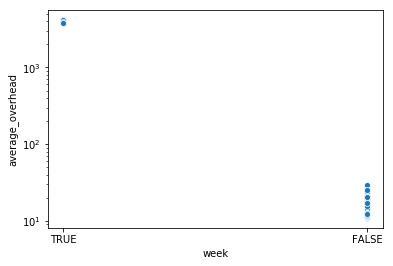

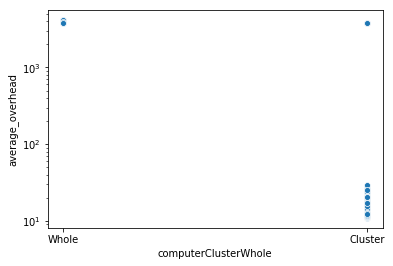

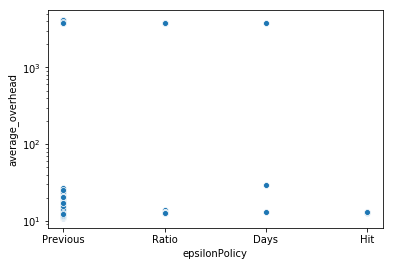

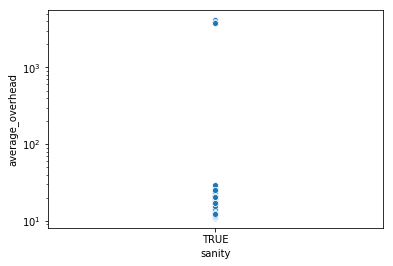

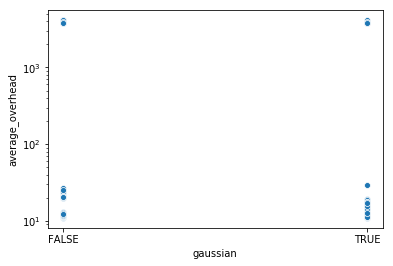

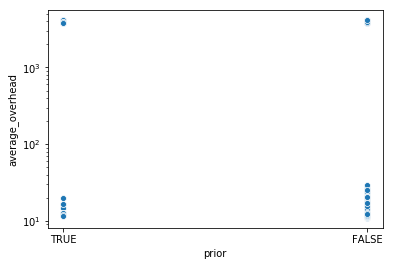

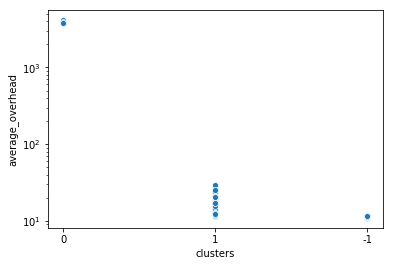

In [36]:
for col in pareto_frontier_clusters.drop(columns=['average_overhead', 'power_condor_total']).columns:
    if isinstance(pareto_frontier_clusters[col].iloc[0], str):
        g = sns.scatterplot(data=pareto_frontier_clusters, x=col, y='average_overhead')
        g.set_yscale('log')
        plt.show()
        plt.close()

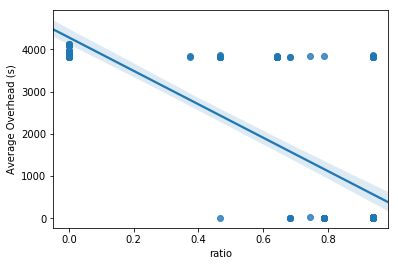

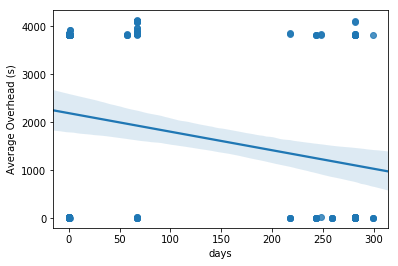

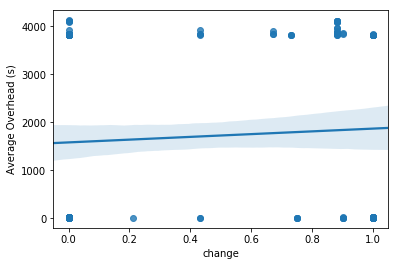

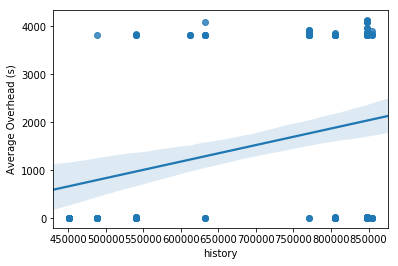

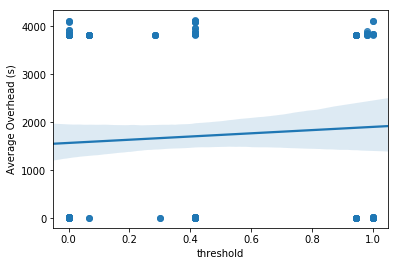

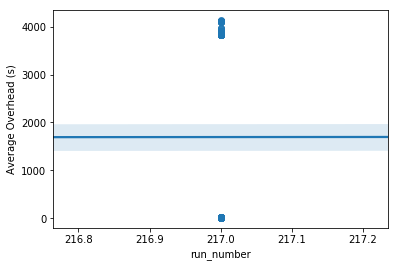

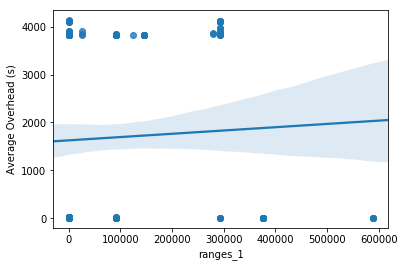

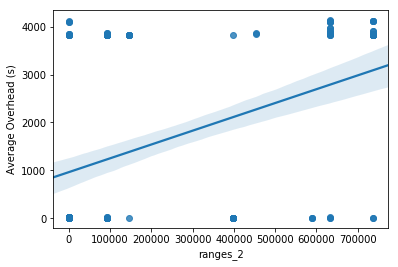

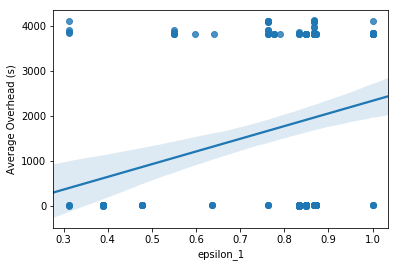

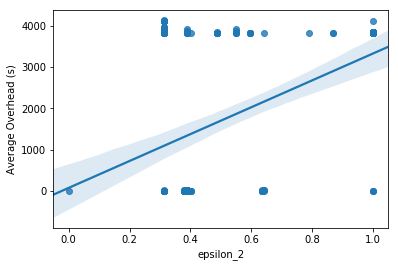

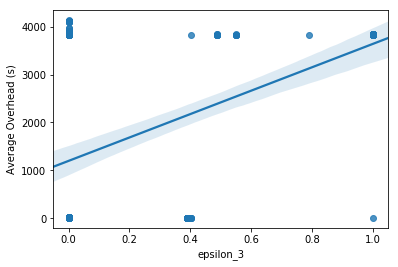

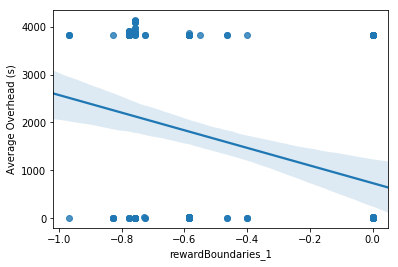

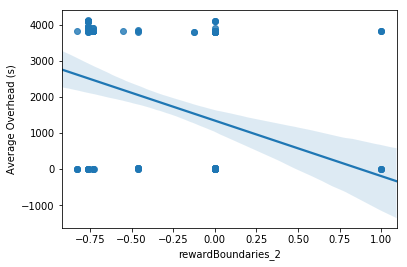

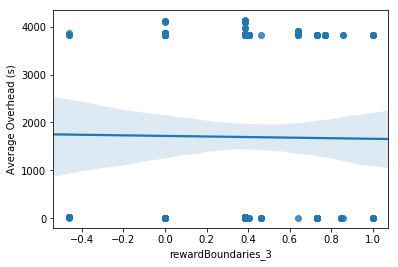

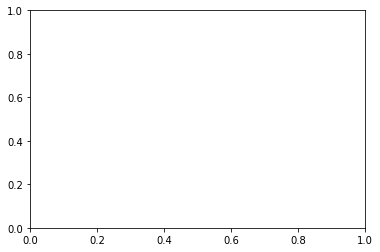

In [37]:
for col in pareto_frontier_clusters.drop(columns=['average_overhead', 'power_condor_total']).columns:
    try:
        g = sns.regplot(data=pareto_frontier_clusters, x=col, y='average_overhead')
        g.set(ylabel='Average Overhead (s)')
        plt.show()
        plt.close()
    except:
        pass

## Log y axis

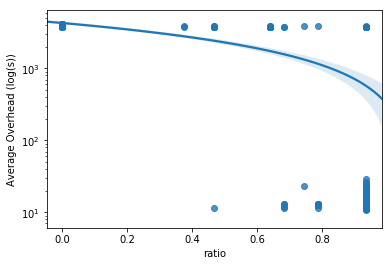

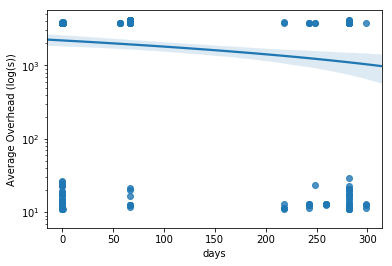

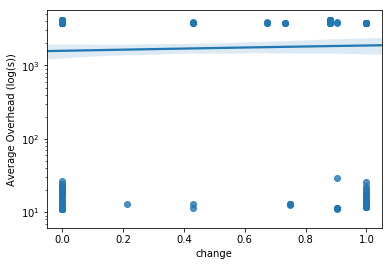

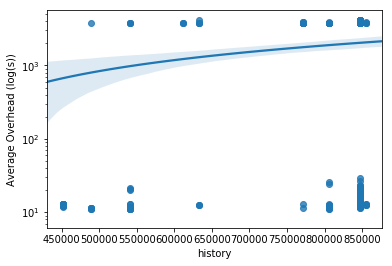

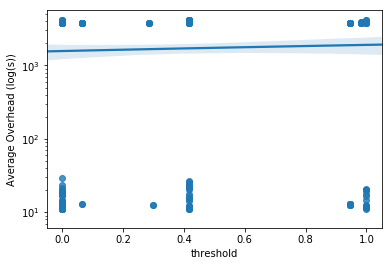

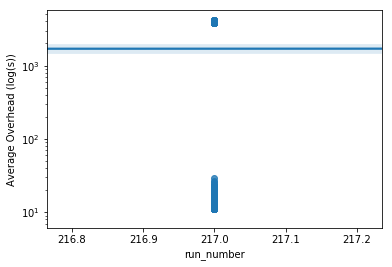

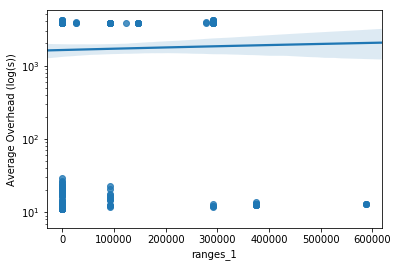

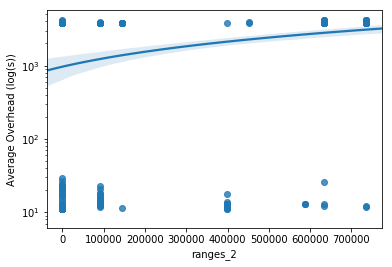

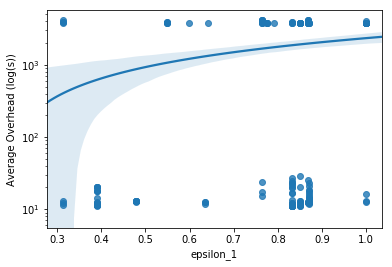

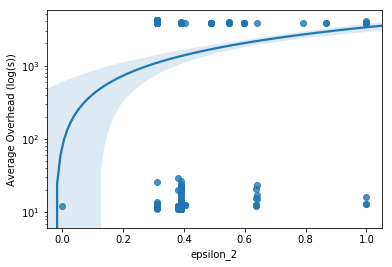

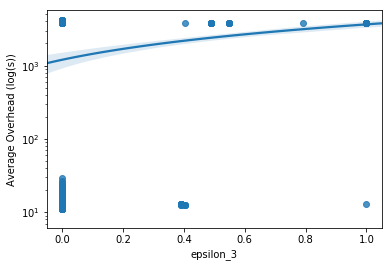

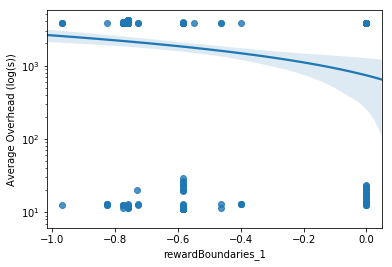

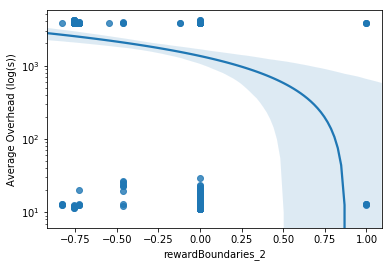

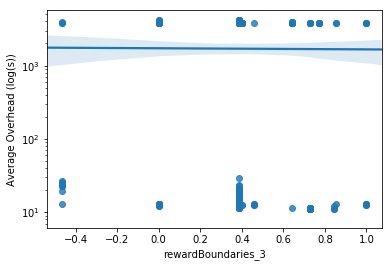

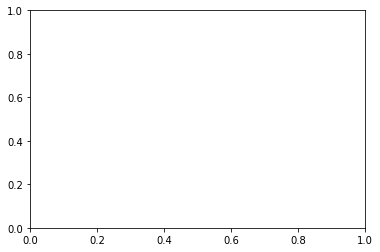

In [38]:
for col in pareto_frontier_clusters.drop(columns=['average_overhead', 'power_condor_total']).columns:
    try:
        g = sns.regplot(data=pareto_frontier_clusters, x=col, y='average_overhead')
        g.set_yscale('log')
        g.set(ylabel='Average Overhead (log(s))')
        plt.show()
        plt.close()
    except:
        pass

## Parameters vs Power Condor Total

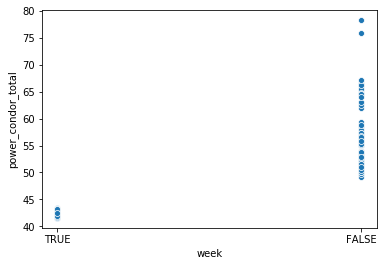

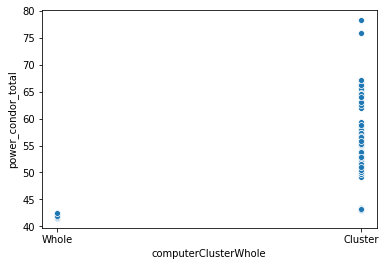

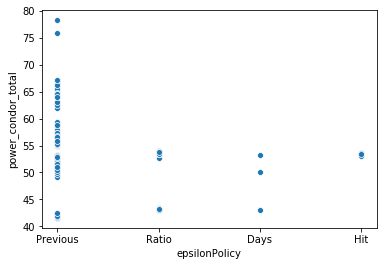

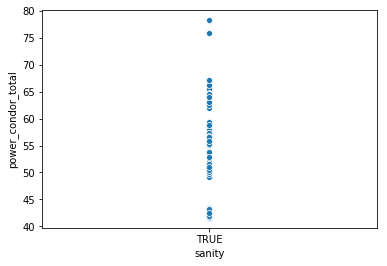

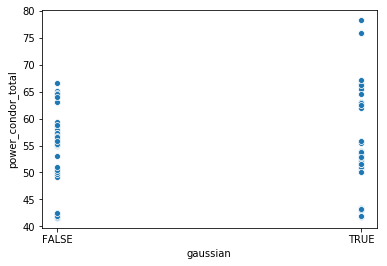

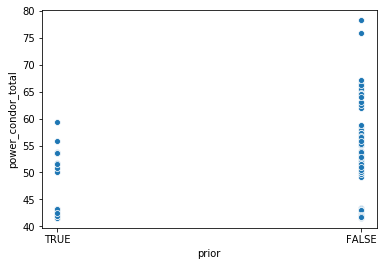

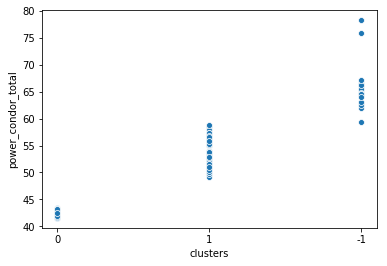

In [39]:
for col in pareto_frontier_clusters.drop(columns=['average_overhead', 'power_condor_total']).columns:
    if isinstance(pareto_frontier_clusters[col].iloc[0], str):
        sns.scatterplot(data=pareto_frontier_clusters, x=col, y='power_condor_total')
        plt.show()
        plt.close()

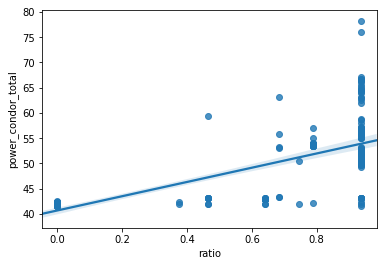

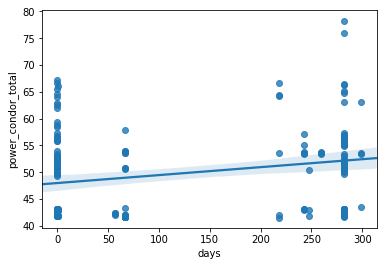

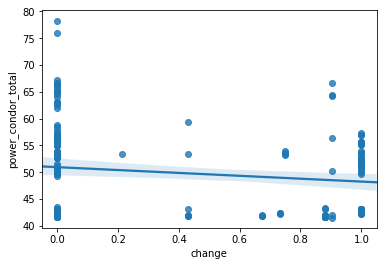

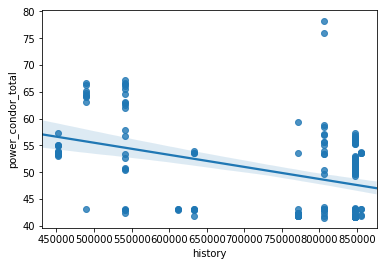

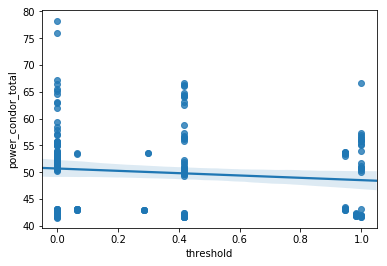

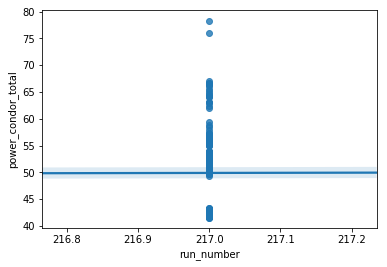

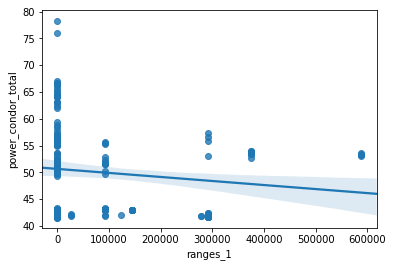

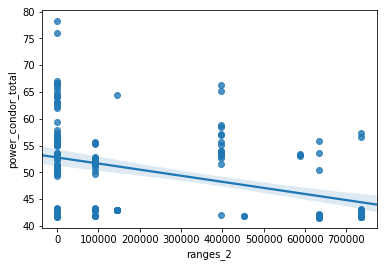

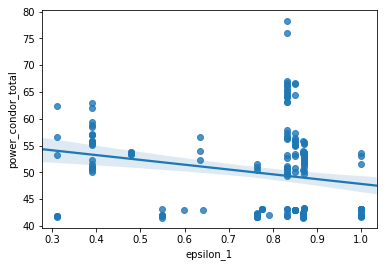

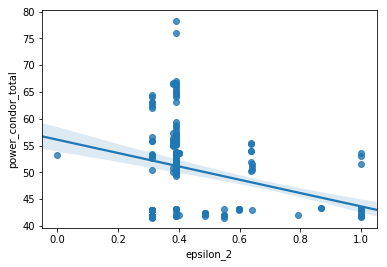

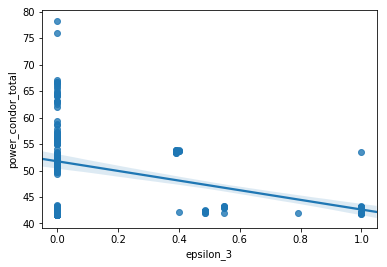

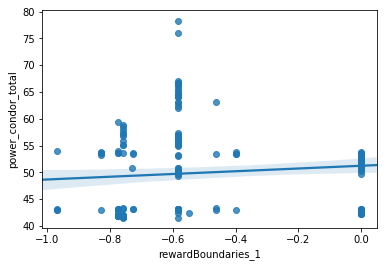

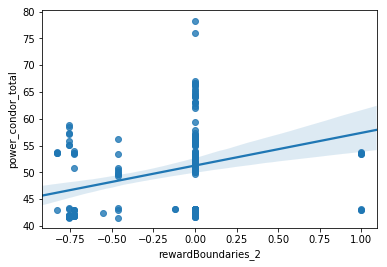

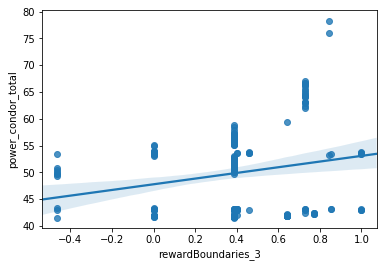

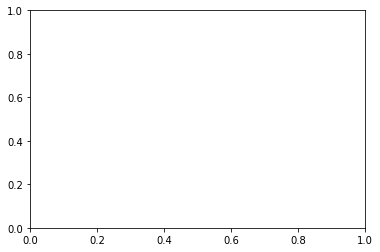

In [40]:
for col in pareto_frontier_clusters.drop(columns=['average_overhead', 'power_condor_total']).columns:
    try:
        sns.regplot(data=pareto_frontier_clusters, x=col, y='power_condor_total')
        plt.show()
        plt.close()
    except:
        pass

# Interaction Plots

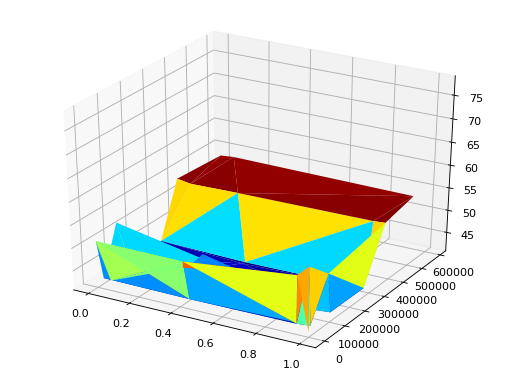

In [52]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.gca(projection='3d')
ax.plot_trisurf(pareto_frontier['threshold'], pareto_frontier['ranges_1'], pareto_frontier['power_condor_total'], cmap=plt.cm.jet)
plt.xlabel('Number of iterations')
plt.ylabel("Average Overhead")
ax.set_zlabel("Total Power Used")

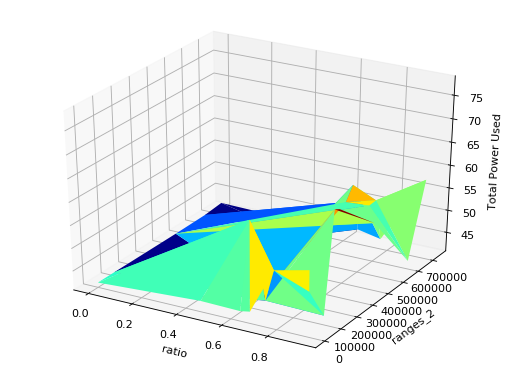

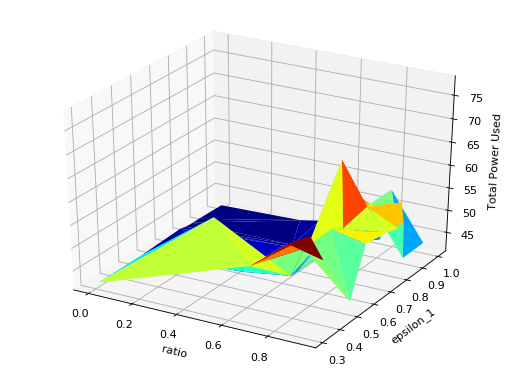

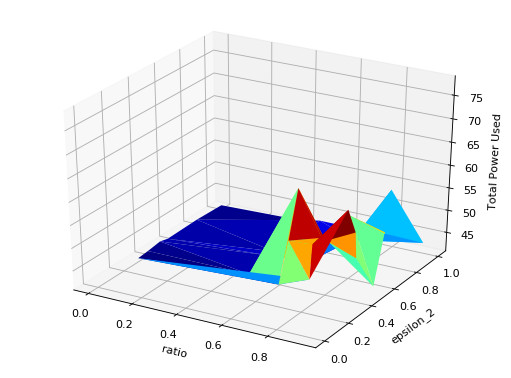

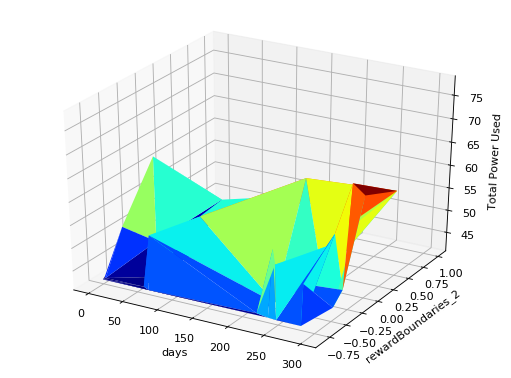

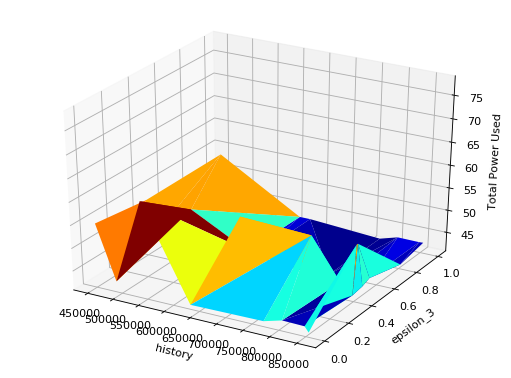

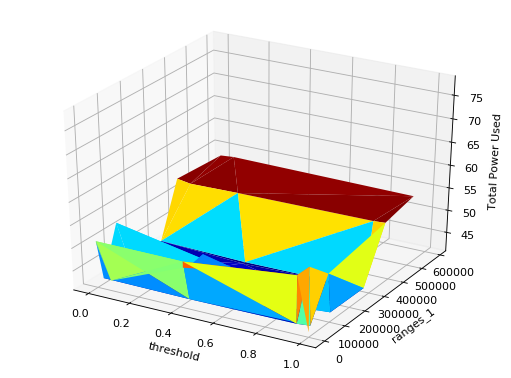

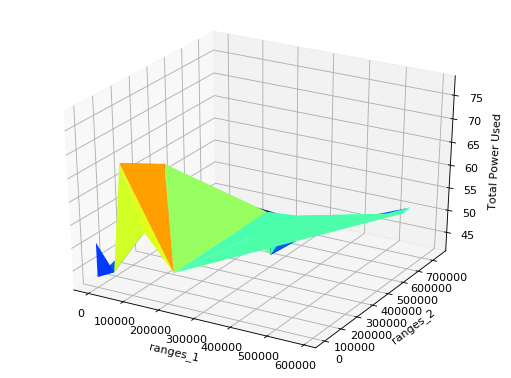

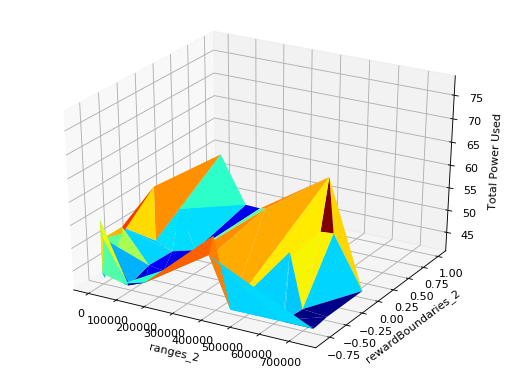

In [59]:
power_interaction_sig = [('ratio','ranges_2'), ('ratio','epsilon_1'), ('ratio','epsilon_2'), ('days','rewardBoundaries_2'), ('history','epsilon_3'), ('threshold', 'ranges_1'), ('ranges_1','ranges_2'), ('ranges_2', 'rewardBoundaries_2')]



for param1, param2 in power_interaction_sig:
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(pareto_frontier[param1], pareto_frontier[param2], pareto_frontier['power_condor_total'], cmap=plt.cm.jet)
    plt.xlabel(param1)
    plt.ylabel(param2)
    ax.set_zlabel("Total Power Used")

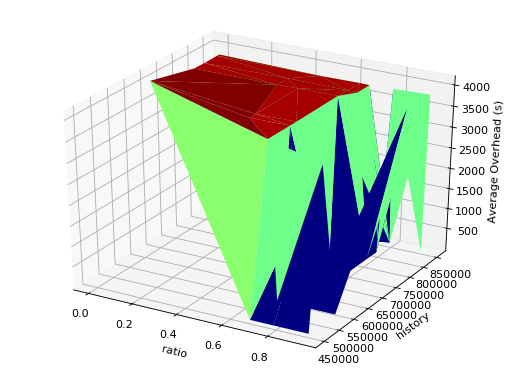

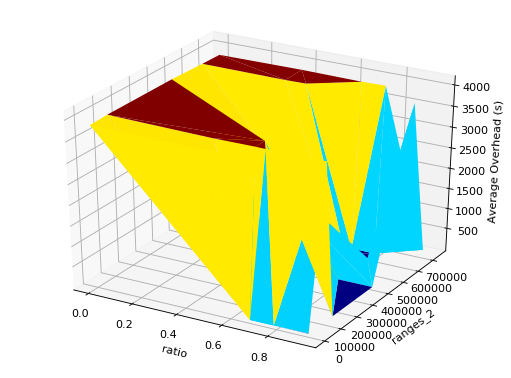

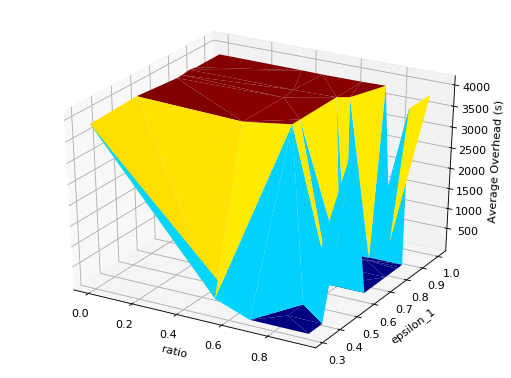

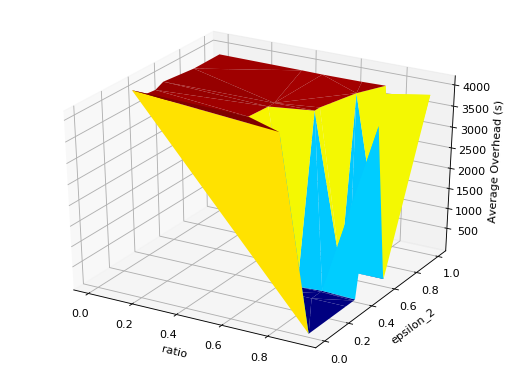

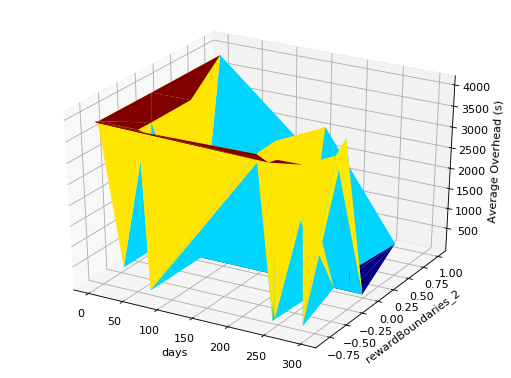

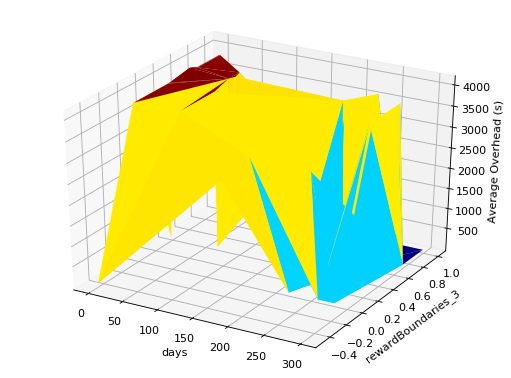

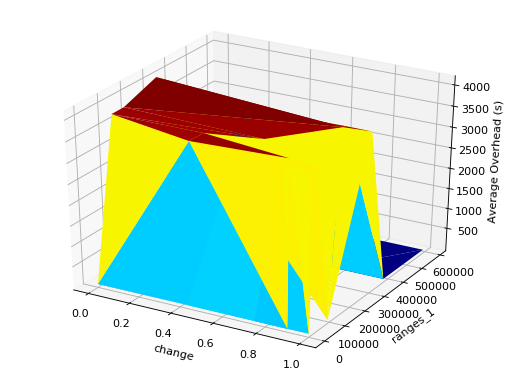

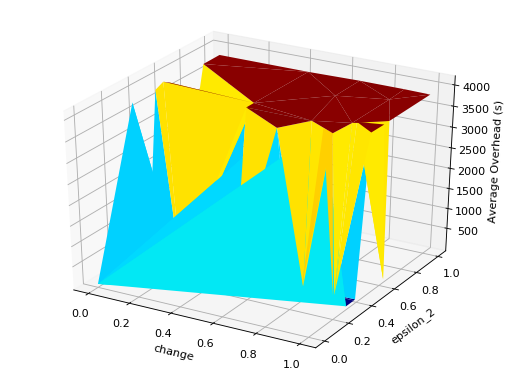

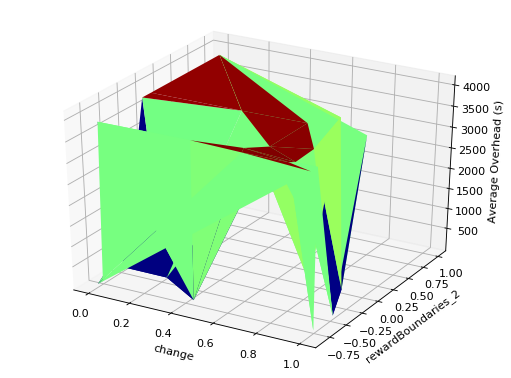

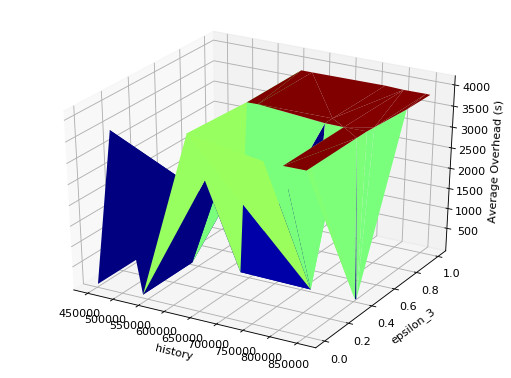

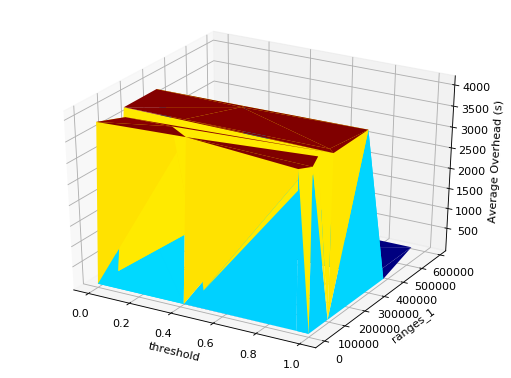

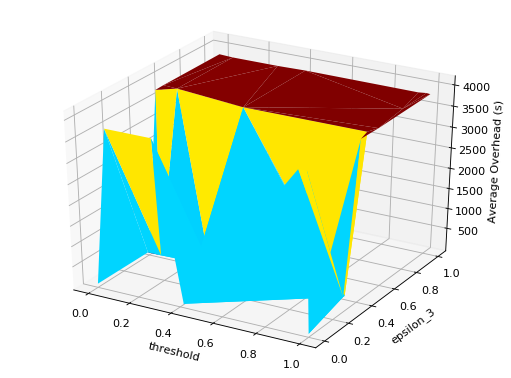

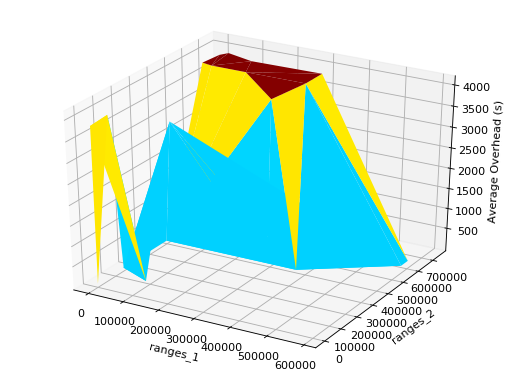

In [60]:
power_interaction_sig = [('ratio','history'), ('ratio','ranges_2'), ('ratio','epsilon_1'), ('ratio','epsilon_2'), ('days','rewardBoundaries_2'), ('days','rewardBoundaries_3'), ('change', 'ranges_1'), ('change', 'epsilon_2'), ('change', 'rewardBoundaries_2'), ('history', 'epsilon_3'), ('threshold', 'ranges_1'), ('threshold', 'epsilon_3'), ('ranges_1', 'ranges_2')]

for param1, param2 in power_interaction_sig:
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(pareto_frontier[param1], pareto_frontier[param2], pareto_frontier['average_overhead'], cmap=plt.cm.jet)
    plt.xlabel(param1)
    plt.ylabel(param2)
    ax.set_zlabel("Average Overhead (s)")
    
    